In [62]:
import pandas as pd

In [63]:
## titanic csv 데이터 가져와서 데이터프레임 만들기
df = pd.read_csv('./csv/titanic_train.csv')

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [67]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [68]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [69]:
df['Embarked'].fillna('S', inplace=True)

In [70]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


In [71]:
X = df.drop('Survived', axis=1)
y = df.loc[:, 'Survived']

In [72]:
X

,Pclass,Sex,Age,Embarked
0,3,male,22.000000,S
1,1,female,38.000000,C
2,3,female,26.000000,S
3,1,female,35.000000,S
4,3,male,35.000000,S
...,...,...,...,...
886,2,male,27.000000,S
887,1,female,19.000000,S
888,3,female,29.699118,S
889,1,male,26.000000,C


In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

In [76]:
X

,Pclass,Sex,Age,Embarked
0,3,1,22.000000,2
1,1,0,38.000000,0
2,3,0,26.000000,2
3,1,0,35.000000,2
4,3,1,35.000000,2
...,...,...,...,...
886,2,1,27.000000,2
887,1,0,19.000000,2
888,3,0,29.699118,2
889,1,1,26.000000,0


In [77]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [78]:
scaler = MinMaxScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

In [79]:
X

,Pclass,Sex,Age,Embarked
0,3,1,0.271174,2
1,1,0,0.472229,0
2,3,0,0.321438,2
3,1,0,0.434531,2
4,3,1,0.434531,2
...,...,...,...,...
886,2,1,0.334004,2
887,1,0,0.233476,2
888,3,0,0.367921,2
889,1,1,0.321438,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)

# BaseEstimator
* sklearn.base.BaseEstimator
* class sklearn.base.BaseEstimator

In [82]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier

In [83]:
be_clf = RandomForestClassifier()
be_clf.fit(X_train, y_train)

pred = be_clf.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [85]:
print("정확도:", accuracy_score(y_test, pred))
print("정밀도:", precision_score(y_test, pred))
print("재현율:", recall_score(y_test, pred))

정확도: 0.7666666666666667
정밀도: 0.7058823529411765
재현율: 0.6857142857142857


상층관계(trade off)

In [86]:
from sklearn.metrics import f1_score

In [87]:
print("f1 score:", f1_score(y_test, pred))

f1 score: 0.6956521739130436


In [92]:
(1/0.7058823529411765 + 1/0.6857142857142857)/2

1.4375

In [93]:
1/1.4375

0.6956521739130435

(1/정밀도 + 1/재현율 )/2 = f1 score

In [94]:
from sklearn.linear_model import LogisticRegression

In [98]:
## 138

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred)
print(pred_proba)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))

[1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0]
[[0.30673966 0.69326034]
 [0.24313959 0.75686041]
 [0.06385122 0.93614878]
 [0.8827164  0.1172836 ]
 [0.92726492 0.07273508]
 [0.6068496  0.3931504 ]
 [0.84989784 0.15010216]
 [0.06457926 0.93542074]
 [0.90268062 0.09731938]
 [0.23392688 0.76607312]
 [0.73260025 0.26739975]
 [0.89937811 0.10062189]
 [0.3013728  0.6986272 ]
 [0.07893166 0.92106834]
 [0.9195562  0.0804438 ]
 [0.4534506  0.5465494 ]
 [0.08362292 0.91637708]
 [0.85475718 0.14524282]
 [0.79209074 0.20790926]
 [0.24783731 0.75216269]
 [0.32739033 0.67260967]
 [0.63959002 0.36040998]
 [0.9195562  0.0804438 ]
 [0.96195566 0.03804434]
 [0.90924633 0.09075367]
 [0.9195562  0.0804438 ]
 [0.85430153 0.14569847]
 [0.23850269 0.76149731]
 [0.90268062 0.09731938]
 [0.8827164  0.1172836 ]
 [0.08303999 0.91696001]
 [0.31763099 0.68236901]
 [0.18382796 0.8

In [102]:
import numpy as np

In [103]:
## 예측 확률 arrayy와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.30673966 0.69326034 1.        ]
 [0.24313959 0.75686041 1.        ]
 [0.06385122 0.93614878 1.        ]]


In [104]:
from sklearn.metrics import precision_recall_curve

In [108]:
## p.141
## 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

## 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds.shape)
print('반환된 precisions 배열의 shape:', precisions.shape)
print('반환된 recalls 배열의 shape:', recalls.shape)

반환된 분류 결정 임계값 배열의 shape: (66,)
반환된 precisions 배열의 shape: (67,)
반환된 recalls 배열의 shape: (67,)


In [109]:
print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

thresholds 5 sample: [0.05737578 0.06018163 0.064632   0.07104291 0.07273508]
precisions 5 sample: [0.39325843 0.38636364 0.3908046  0.39534884 0.4       ]
recalls 5 sample: [1.         0.97142857 0.97142857 0.97142857 0.97142857]


In [110]:
## 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임계값 배열의 index 10개: [ 0 15 30 45 60]
샘플용 10개의 임계값: [0.06 0.13 0.36 0.67 0.92]


In [111]:
## 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계갑별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계갑별 재현율:', np.round(recalls[thr_index], 3))

샘플 임계갑별 정밀도: [0.393 0.509 0.571 0.875 1.   ]
샘플 임계갑별 재현율: [1.    0.829 0.686 0.6   0.171]


In [118]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

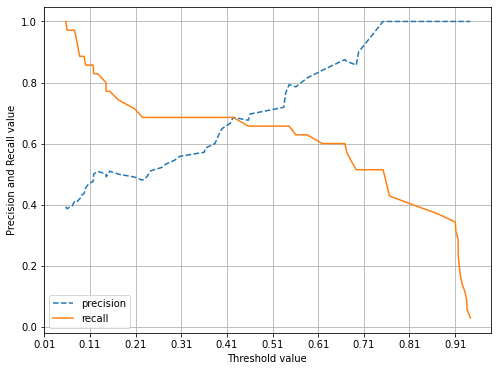

In [123]:
## p.142
def precision_recall_curve_plot(y_test, pred_proba_c1):
    ## threshold ndarray와 이 threshold에 따른 정밀도, 재현을 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    ## x축을 threshold값으로, Y축은 정밀도, 재현을 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    ## threshold값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    ## x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])